# A/B Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm

In [2]:
np.random.seed(42)

n_players = 2000

# Randomly assign players to control/treatment
groups = np.random.choice(["A", "B"], size=n_players)

# Base retention probs
retention_A = 0.30
retention_B = 0.36

# Simulate per-player outcomes
returned = []

for g in groups:
    if g == "A":
        returned.append(np.random.binomial(1, retention_A))
    else:
        returned.append(np.random.binomial(1, retention_B))

df_exp = pd.DataFrame({
    "group": groups,
    "returned": returned
})

df_exp.head()


,group,returned
0,A,0
1,B,0
2,A,1
3,A,1
4,A,1


In [3]:
summary = df_exp.groupby("group")["returned"].agg(["mean", "count", "sum"])
summary.rename(columns={"mean": "retention_rate"}, inplace=True)
summary

,retention_rate,count,sum
group,,,
A,0.314961,1016,320
B,0.371951,984,366


In [10]:
# Counts
A = summary.loc["A", "sum"]
B = summary.loc["B", "sum"]

# Sample sizes
nA = summary.loc["A", "count"]
nB = summary.loc["B", "count"]

# Sample proportions
pA = A / nA
pB = B / nB

# Pooled proportion
p_pool = (A + B) / (nA + nB)

# Standard error
se = sqrt(p_pool * (1 - p_pool) * (1/nA + 1/nB))

# Z-statistic and p-value (two-sided)
z = (pB - pA) / se
p_value = 2 * (1 - norm.cdf(abs(z)))

lift = pB - pA

print("pA (control retention):", pA)
print("pB (treatment retention):", pB)
print("Lift (B - A):", lift)
print("z-stat:", z)
print("p-value:", p_value)

pA (control retention): 0.31496062992125984
pB (treatment retention): 0.3719512195121951
Lift (B - A): 0.05699058959093528
z-stat: 2.6841254536248935
p-value: 0.0072719813172004155


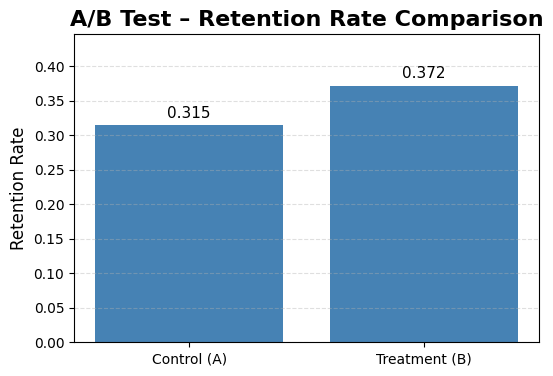

In [9]:
groups = ["Control (A)", "Treatment (B)"]
rates = [pA, pB]

plt.figure(figsize=(6,4))

plt.bar(groups, rates, color="steelblue")

plt.title("A/B Test – Retention Rate Comparison", fontsize=16, weight="bold")
plt.ylabel("Retention Rate", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.4)

for i, rate in enumerate(rates):
    plt.text(
        i,
        rate * 1.03,
        f"{rate:.3f}",
        ha="center",
        fontsize=11
    )

plt.ylim(0, max(rates) * 1.20)

plt.savefig("../plots/a_b_test_retention.png", dpi=300, bbox_inches="tight")
plt.show()